In [1]:
import pandas as pd
from create_metafeatures import get_datasets, get_classifiers, get_resamplers, get_existing_solutions
import itertools
from pathlib import Path
from create_metafeatures import get_classifiers, get_resamplers, get_datasets

datasets = get_datasets()
OUTPUT_TARGET_COUNT = len(get_classifiers()) * len(get_resamplers()) * len(datasets)
TARGETS_PER_DATASET = len(get_classifiers()) * len(get_resamplers())
TARGETS_PER_CLASSIFIER = len(get_resamplers()) * len(datasets)
TARGETS_PER_RESAMPLER = len(get_classifiers()) * len(datasets)

print(f"Total number of targets: {OUTPUT_TARGET_COUNT}")
print(f"Number of targets per dataset: {TARGETS_PER_DATASET}")
print(f"Number of targets per classifier: {TARGETS_PER_CLASSIFIER}")
print(f"Number of targets per resampler: {TARGETS_PER_RESAMPLER}")
print(f"Number of datasets: {len(datasets)}")

Preprocessing Datasets to ../data/processed_datasets: 100%|██████████| 155/155 [00:01<00:00, 135.82it/s]

Total number of targets: 23360
Number of targets per dataset: 160
Number of targets per classifier: 2920
Number of targets per resampler: 1168
Number of datasets: 146


In [2]:
existing_solutions = get_existing_solutions(Path("merged_metafeatures.csv"))
combinations = itertools.product(datasets, get_classifiers().keys(), get_resamplers().keys())
combinations = [c for c in combinations if (c[0].stem, c[1], c[2]) not in existing_solutions]
combinations = [(c[0].stem, c[1], c[2]) for c in combinations]

print(f"Total number of combinations: {len(combinations)}")

missing_datasets = [d for d in datasets if d not in combinations[:][0]]
missing_datasets = set(missing_datasets)
print(f"Number of missing datasets: {len(missing_datasets)}")




Total number of combinations: 11109
Number of missing datasets: 146


              dataset classifier          resampler
0      glass-0-4_vs_5        xgb               none
1      glass-0-4_vs_5        xgb              smote
2      glass-0-4_vs_5        xgb           smoteenn
3      glass-0-4_vs_5        xgb  randomoversampler
4      glass-0-4_vs_5        xgb             adasyn
...               ...        ...                ...
11104    HeartDisease        cat   repeatededitednn
11105    HeartDisease        cat             allknn
11106    HeartDisease        cat        condensednn
11107    HeartDisease        cat                ncl
11108    HeartDisease        cat   instancehardness

[11109 rows x 3 columns]


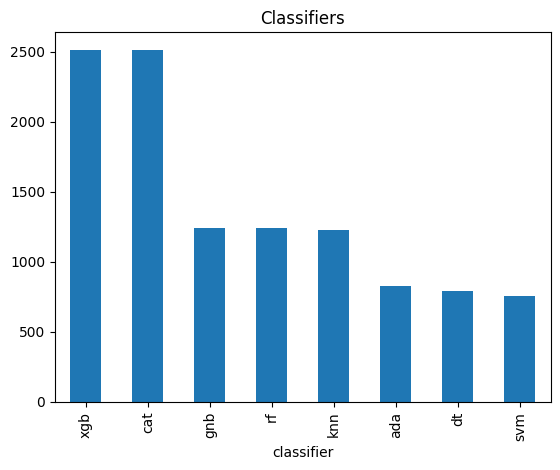

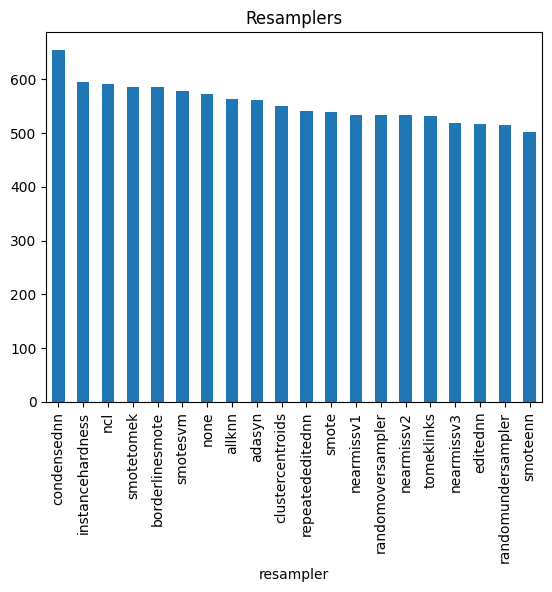

<Axes: title={'center': 'Datasets'}, xlabel='dataset'>

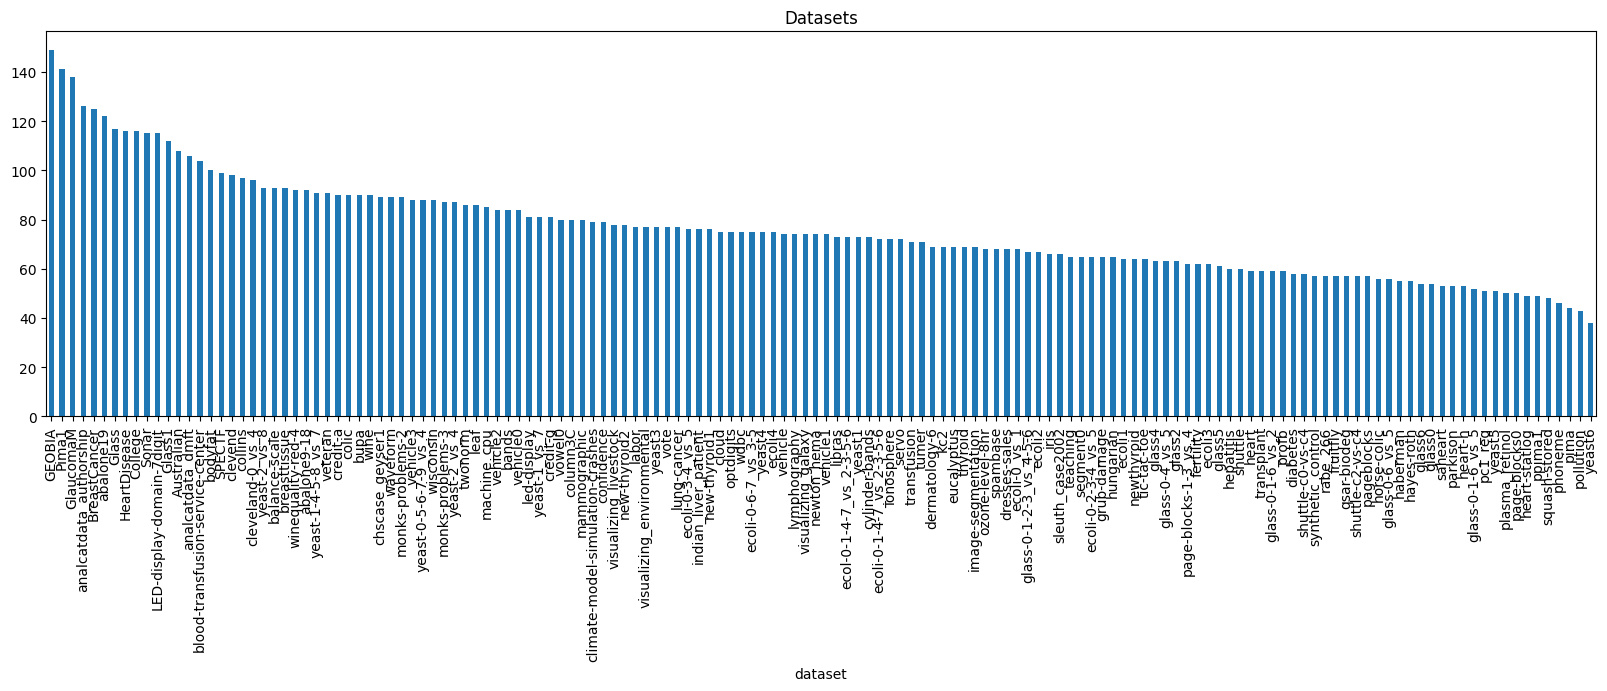

In [11]:
import matplotlib.pyplot as plt


df = pd.DataFrame(combinations, columns=["dataset", "classifier", "resampler"])
print(df)

df['classifier'].value_counts().plot(kind='bar', title='Classifiers')
plt.show()
plt.close()
df['resampler'].value_counts().plot(kind='bar', title='Resamplers')
plt.show()
plt.close()

plt.figure(figsize=(20, 5))
df['dataset'].value_counts().plot(kind='bar', title='Datasets')


